In [2]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=6097b348f3ae2501fe4f1ffca022c4d8ef2dc8060a25ab1f979b61f921d884d4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def qplot(x):
  return x.draw('mpl',scale=0.7, style= 'iqx', initial_state = True)

Text(0.5, 1.0, 'Sinusoidal function')

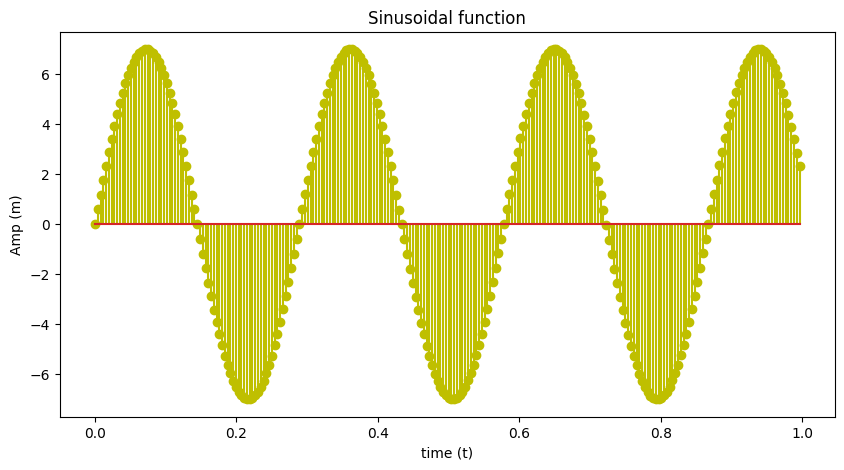

In [5]:
srate = 256  # sampling rate Hz

# time interval
t = np.arange(0. , 1. ,1/srate)

# three different waves
amp = 7
f = 3.46

x = amp * np.sin(2*np.pi * f * t)   # First Sine Wave


plt.figure(figsize=(10,5))
plt.stem(t,x, "yo")
plt.xlabel("time (t)")
plt.ylabel("Amp (m)")
plt.title("Sinusoidal function")

In [6]:
x

array([ 0.00000000e+00,  5.93734005e-01,  1.18318881e+00,  1.76411604e+00,
        2.33232881e+00,  2.88373185e+00,  3.41435105e+00,  3.92036208e+00,
        4.39811799e+00,  4.84417547e+00,  5.25531965e+00,  5.62858730e+00,
        5.96128819e+00,  6.25102444e+00,  6.49570785e+00,  6.69357492e+00,
        6.84319956e+00,  6.94350340e+00,  6.99376351e+00,  6.99361765e+00,
        6.94306688e+00,  6.84247553e+00,  6.69256859e+00,  6.49442648e+00,
        6.24947726e+00,  5.95948635e+00,  5.62654380e+00,  5.25304920e+00,
        4.84169444e+00,  4.39544427e+00,  3.91751493e+00,  3.41135099e+00,
        2.88060051e+00,  2.32908876e+00,  1.76079062e+00,  1.17980199e+00,
        5.90310199e-01, -3.43611683e-03, -5.97157668e-01, -1.18657534e+00,
       -1.76744104e+00, -2.33556831e+00, -2.88686250e+00, -3.41735028e+00,
       -3.92320829e+00, -4.40079066e+00, -4.84665533e+00, -5.25758883e+00,
       -5.63062945e+00, -5.96308858e+00, -6.25257011e+00, -6.49698765e+00,
       -6.69457963e+00, -

In [7]:
np.max(x)

6.99460325368506

In [8]:
const = np.sqrt(sum(x**2))
const

79.62293182747878

Text(0.5, 1.0, 'Sinusoidal function')

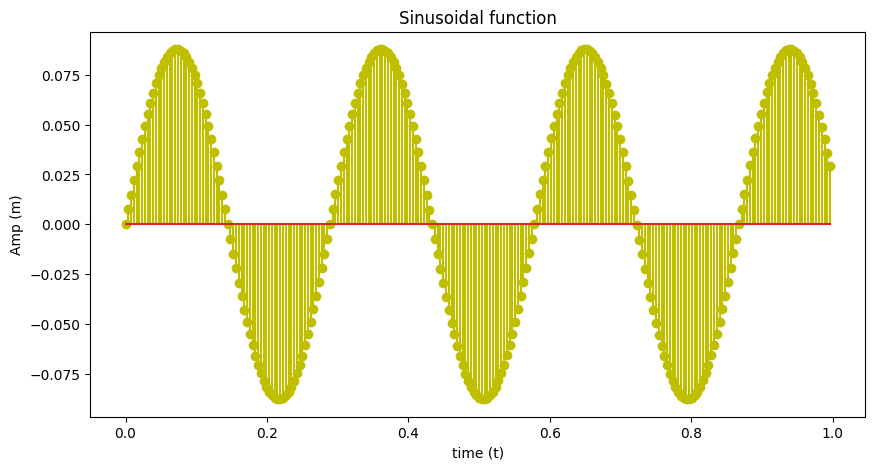

In [10]:
x_norm = x/const


plt.figure(figsize=(10,5))
plt.stem(t,x_norm, "yo")
plt.xlabel("time (t)")
plt.ylabel("Amp (m)")
plt.title("Sinusoidal function")

How is the normalization of x situation?

In [11]:
sum(x_norm**2)

1.0

In [12]:
np.max(x_norm)

0.08784659259772626

# FFT

In [13]:
X = np.fft.fft(x)/len(t)

Text(0.5, 1.0, 'DFT of x_norm')

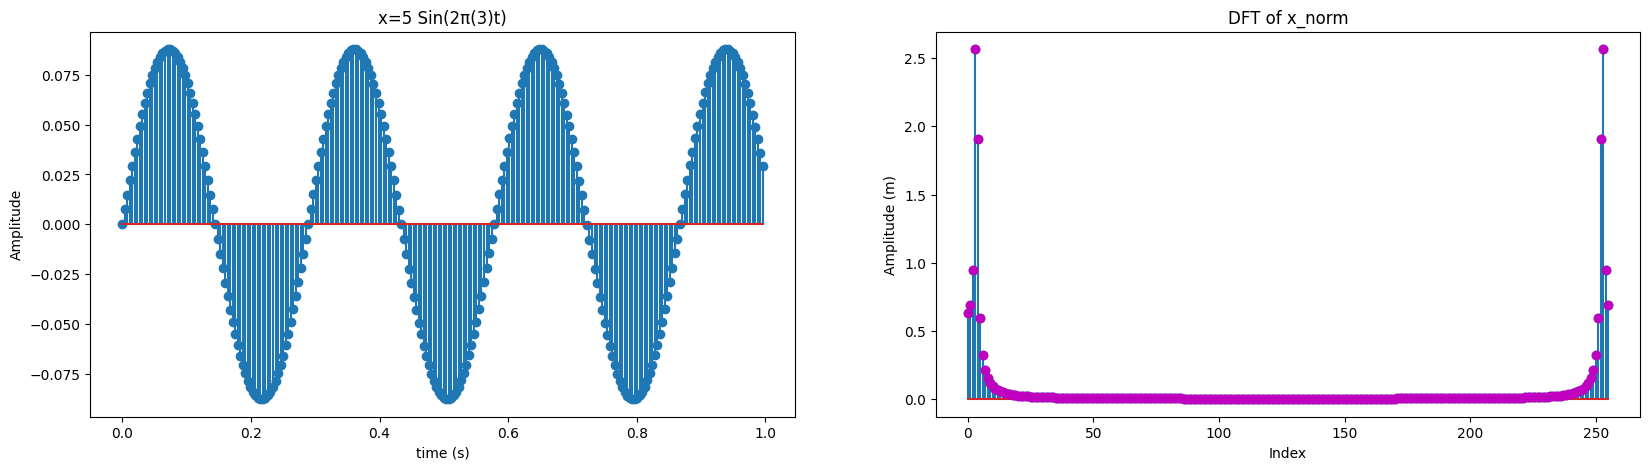

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

## Create a list for using in qiskit inialization function

In [13]:
ampl = []
for i in range(srate):
  ampl.append(x_norm[i])

len(ampl)

256

# Qiskit Implementation of QFT for a sinusoidal function
$$x(t) = A sin(2π f t/s_{rate})$$
for
A = 5 m \\
f = 3 Hz \\
$s_{rate}$ = 256

In [14]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.circuit.library import QFT

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


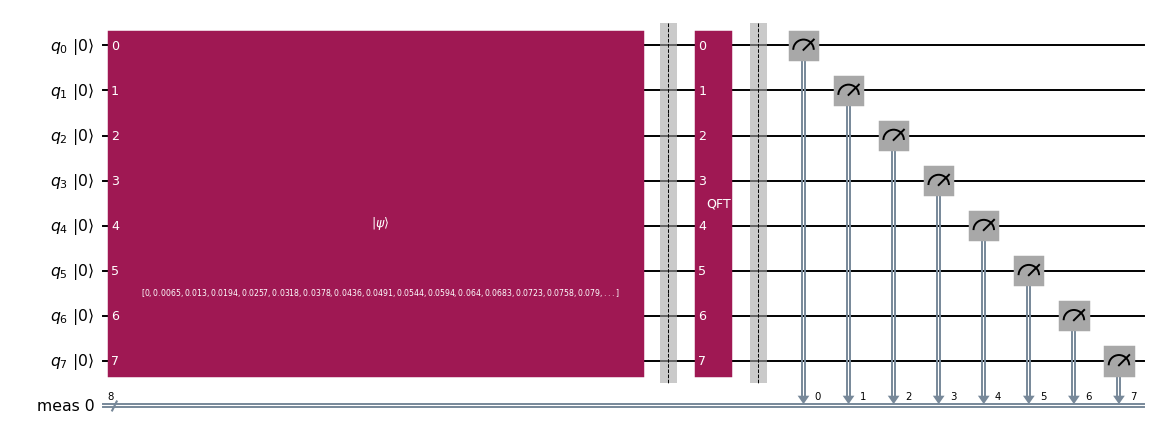

In [15]:
# 1. How many qubits do we need?
n = int(np.log2(srate))

# 2. create a quantum circuit with n qubit
qc = QuantumCircuit(n)

# Initialization of discritized signal x_norm
qc.initialize(ampl,[[0],[1],[2],[3],[4],[5],[6],[7]])
qc. barrier()

# Computing the QFT
qft = QFT(num_qubits=n)
qc = qc.compose(qft)

# measurement
qc.measure_all()

# visualization
qplot(qc)


# Simulating the measurement

In [16]:
from qiskit_aer import AerSimulator

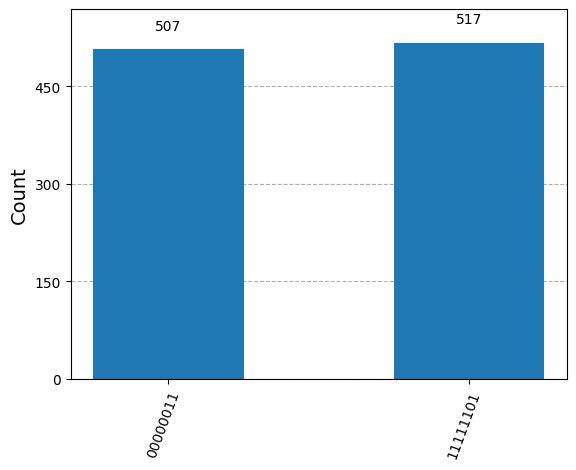

In [17]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

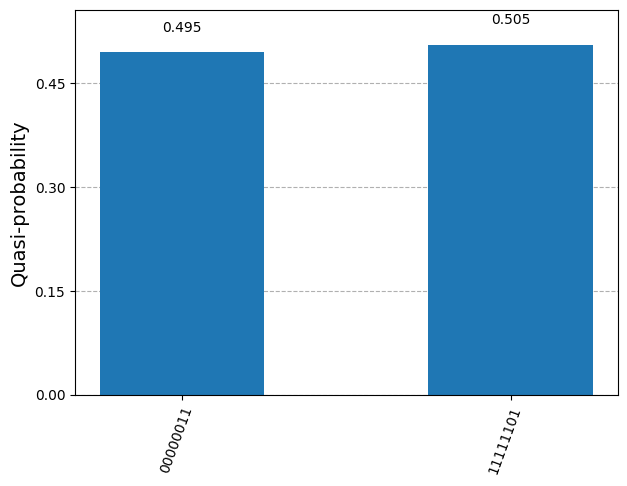

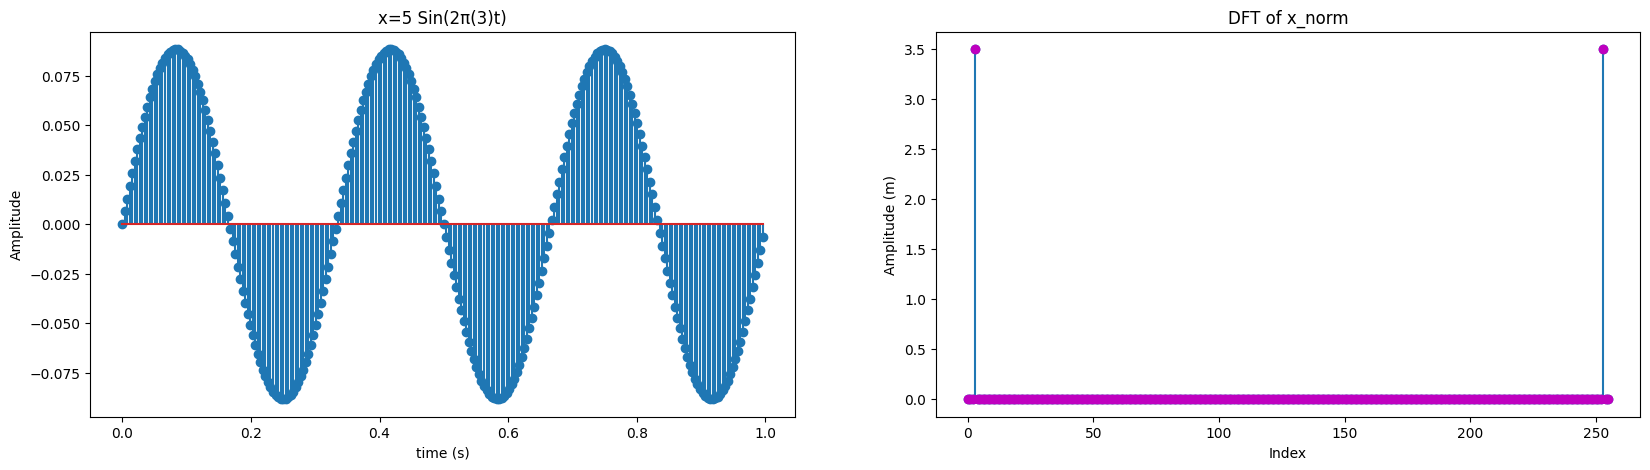

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

plot_distribution(counts)

In [19]:
counts

{'00000011': 507, '11111101': 517}

In [20]:
p = (538/1024)
p

0.525390625

In [21]:
np.sqrt((p*const)/256)

0.4031555931000283

In [22]:
np.sqrt(p*const)

6.450489489600453

In [23]:
x_norm[3]*2

0.038731993170326225

In [24]:
# Initialize a list to store the converted integers
converted_integers = []

# Iterate through the measurement results
for binary_string, count in counts.items():
    # Split the binary string into individual components
    components = binary_string.split(' ')
    # Concatenate the components to form a single binary string
    concatenated_binary = ''.join(components)
    # Convert the concatenated binary string to an integer
    integer_value = int(concatenated_binary, 2)
    # Append the integer value to the list
    converted_integers.append(integer_value)

print(converted_integers)

[3, 253]
